<h1>Analisando a Estabilidade de Equil&iacute;brios</h1>
<p>Nos modelos que analisamos neste curso, nem sempre lineares mas autônomos e de primeira ordem, desejamos poder determinar a estabilidade local de seus Equil&iacute;brios.</p>

<p>Dizer que um equilíbrio $f_e$ é localmente estável significa dizer que para uma qualquer solução f(t) com condições iniciais localizadas até uma distância $\varepsilon>0$ do equilíbrio em questão, permanece a uma disância $\|f(t)-f_e\|\leq\varepsilon$ para todo $t\geq t_0$. </p>
    
<p>Para estudar a estabilidade, podemos lan&ccedil;ar m&atilde;o da an&aacute;lise de estabilidade linear. Mesmo que o sistema em que estamos interessados n&atilde;o seja linear, podemos fazer uma aproxima&ccedil;&atilde;o linear na vizinhan&ccedil;a do equil&iacute;brio, e a partir do sistema linear resultante. estudar a estabilidade na vizinhan&ccedil;a do(s) equil&iacute;brio(s) do sistema.</p>
<p>Uma vez obtido um sistema linear, &eacute; preciso examinar a sua matriz de coeficientes, ou matriz <strong>Jacobiana</strong>, $J$. 
    
    \begin{align}
    
    \end{align}

    
    
 Seja $p = Tr(J) = A+D$ o tra&ccedil;o da matriz $J$ e $q=det(J)=AD-BC$, o determinante de $J$. A representação dos equilíbrio  plano $(Det J, Tr J)$ nos ajuda a classificar os equilíbrios:</p>
<ul>
</ul>
<p><img src="http://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Phase_plane_nodes.svg/624px-Phase_plane_nodes.svg.png" alt="" width="624" height="599" /></p>
<p>A natureza dos autovalores (principalmente o autovalor dominante, $\lambda_d$) da matriz jacobiana determinam o tipo do equil&iacute;brio do sistema.&nbsp;</p>
<h3>Autovalores reais:</h3>
<ul>
<li>Sinais opostos ($Re(\lambda_d)>0$): Equil&iacute;brio em ponto de sela</li>
<li>Diferentes e com sinais negativo: Equil&iacute;brio pontual est&aacute;vel</li>
<li>Diferentes e com sinais Positivos: Equilibrio pontual inst&aacute;vel</li>
</ul>
<h3>Autovalores Complexos:</h3>
<p>Solu&ccedil;&otilde;es oscilat&oacute;rias.&nbsp;</p>
<ul>
<li>$Re(\lambda_d) \lt 0$: oscila&ccedil;&otilde;es com amplitude decrescente (est&aacute;vel)</li>
<li>$Re(\lambda_d) \gt 0$: Oscila&ccedil;&otilde;es com amplitude crescente (inst&aacute;vel)</li>
<li>$Re(\lambda_d) = 0$: Oscila&ccedil;&otilde;es com amplitudes constantes: ciclo limite (est&aacute;vel)</li>
</ul>

In [5]:
var('A B C D x y')
J = jacobian([A*x+B*y, C*x+B*y],[x,y])
J

[A B]
[C B]

In [6]:
J.trace()

A + B

In [7]:
J.det()

A*B - B*C

In [9]:
J.characteristic_polynomial()

x^2 + (-A - B)*x + A*B - B*C

## EDO Cúbica Unidimensional
Em sistema unidimensionais é ainda mais simples entender a natureza dos equilíbrios. Um instrumento gráfico útil olhar para a o gráfico da EDO. Por exemplo seja a seguinte EDO cúbica:

$$\frac{dx}{dt}=r x - x^3$$

Lembrando que por definição, equilíbrios são estados em que $dx/dt=0$, vemos que os equilíbrios deste sistema dinâmico são as raízes desta funcão polinomial de 3⁰ grau. Neste caso são 3:

'Raízes=' [x == -sqrt(r), x == sqrt(r), x == 0]

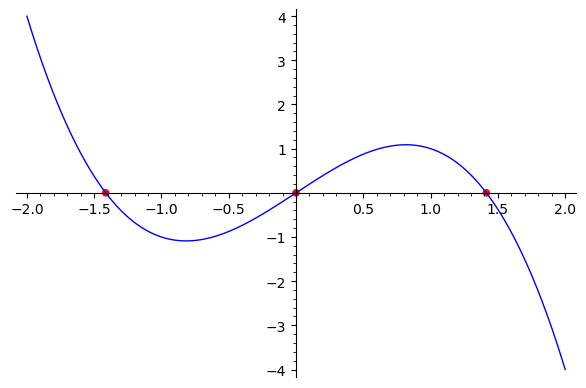

In [18]:
%display typeset
var('r')
f(x) = r*x - x^3
raízes = solve(f,x)
show("Raízes=",raízes)
F=plot(f(r=2),(x,-2,2))
P=points([(-sqrt(2),0),(sqrt(2),0),(0,0)], pointsize=30, color='red')
F+P

Você consegue dizer apenas olhando para o gráfico acima, quais equilíbrios são estáveis ou instáveis?

E no caso do gráfico abaixo quando $r=0$?

In [10]:
@interact
def cubica(r=(-2,2,1)):
    P = plot(f(r=r), (x,-1.5,1.5))
    raízes = solve(f,x)
    show("Raízes=",raízes)
    P2=points([(-sqrt(r),0),(sqrt(r),0),(0,0)], pointsize=30, color='red')
    show(P+P2)

Interactive function <function cubica at 0x7fcaa7032040> with 1 widget
  r: IntSlider(value=0, description='r'…

No caso desta cúbica quando $r=0$, temos apenas um equilíbrio em $0$. Para obter a estabilidade do equilíbrio a chave é olhar para o sinal da derivada de $f(x)=rx-x^3$, com $r=0$ $f'(x)=-3x^2$. Podemos verificar na solução numérica de x(t)

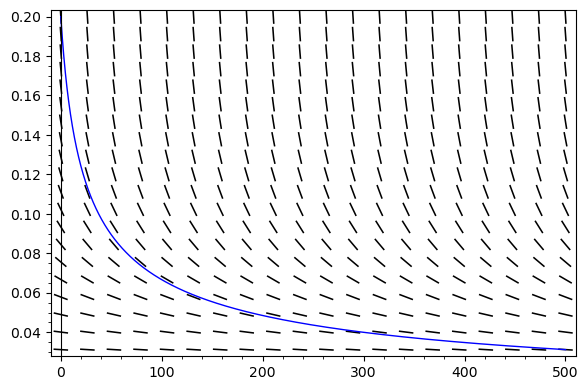

In [19]:
desolve_rk4(-x^3,x,ics=[0,.2],ivar='t', end_points=500, output='slope_field')


## Bifurcações

Em vários modelos alterações no valor de certos valores podem alterar o número de equilíbros ou mesmo a natureza destes. Retomando um modelo que já vimos:

$$\frac{dx}{dt}= c \left( x-\frac{x^3}{3}+A \right) \equiv f(x)$$

Já vimos que este modelo apresenta 3 equilíbrios: 2 estáveis separados por um instável, quando $A=0$, por exemplo.


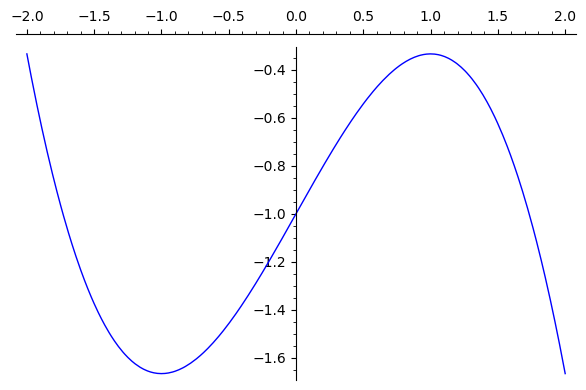

In [22]:
var('A')
f(x) = x-x^3/3+A
g = f(A=-1)
plot(g,(x,-2,2))



É fácil ver que para valores de $|A| \gt A_1$ dois dos equilíbrios desaparecem. Na figura abaixo, mostramos os pontos $A_1=-A_2$ em que os dois equilíbrios coalescem e como a partir destes limiares temos apenas um equilíbrio real e dois complexos iguais com sinais opostos na parte imaginária.

Esta mudança no comportamento qualitativo do modelo é chamada de bifurcação, e o parâmetro $A$, é o parêmetro de bifurcação. Como esta curva  de bifurcação parece dobrar-se sobre si mesma, este tipo de bifurcações que vemos é chamado de bifurcação em "dobra" ou "fold bifurcation".


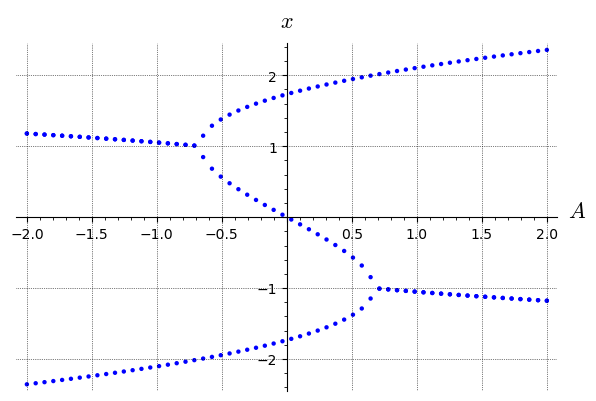

In [23]:
import numpy as np
pts = []
for v in np.linspace(-2,2,60):
    g = f(A=v)
    xvals = solve(g,x)
    pts.extend([[v,n(i.rhs().real_part())] for i in xvals])
    
show(points(pts),axes_labels=['$A$','$x$'],gridlines=True)

In [34]:
sols = solve(f(A=0.7),x)
[s.rhs().n() for s in sols]

[-1.00551492842663 - 0.182156015180445*I,
 -1.00551492842663 + 0.182156015180445*I,
 2.01102985685326]


## Bi-Estabilidade e Histerese

Quando um sistema apresenta dois equilíbrios estáveis é denominado bi-estável. Esta bi-estabilidade  nos leva a um outro fenômeno que pode ser observado no modelo cúbico acima, denominado de Histerese. Histerese é quando a transição entre os equilíbrios ocorre em diferentes valores do parâmetro de bifurcação dependendo se nos aproximamos pela esquerda ou pela direita.
Bifurcações em um Parâmetro

Vamos examinar brevemente exemplos simples de alguns tipos de bifurcações locais mais comuns:
### Bifurcação em dobra

A equação diferencial mais simples que apresenta bifurcação em dobra é a seguinte:

$$\frac{dx}{dt}=f(x)=r+x^2$$

Se variarmos $r$ a parábola resultante ganhará ou perderá dois pontos de interseção com o eixo $x$. Logo a bifurcação ocorrerá quando $r=0$. Vejamos:


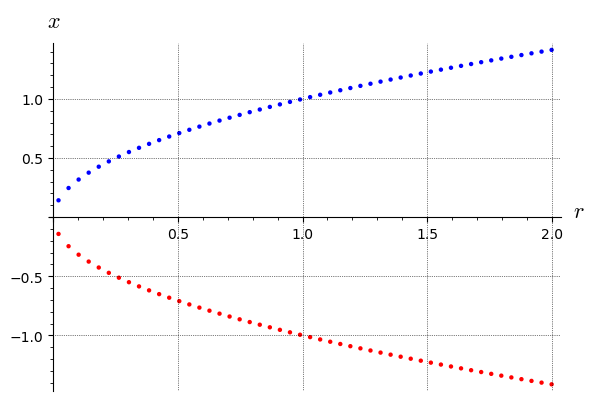

In [24]:
def drawbif(func,l,u):
    ipts = []
    epts = []
    for v in np.linspace(l,u,100):
        g = func(r=v)
        xvals = solve(g,x)
        dg = diff(g,x)
        est = [(e.rhs().real_part(),dg(x=e.rhs().real_part())) for e in xvals]
        for e in est:
            if e[1]<0:
                epts.append((v,n(e[0])))
            elif e[1] == 0:
                pass
            else:
                ipts.append((v,n(e[0])))
    eplot = points(epts, color="blue")
    iplot = points(ipts, color="red")
    show(eplot+iplot,axes_labels=['$r$','$x$'],gridlines=True, xmax=2)
var('r')
f(x) = r - x^2
drawbif(f,-2,2)


### Bifurcação Transcrítica

Este tipo de bifurcação tem a seguinte equação como seu exemplo mais simples:

$$\frac{dx}{dt}= r x -x^2$$

à media que r varia, a função se transforma como podemos ver abaixo:


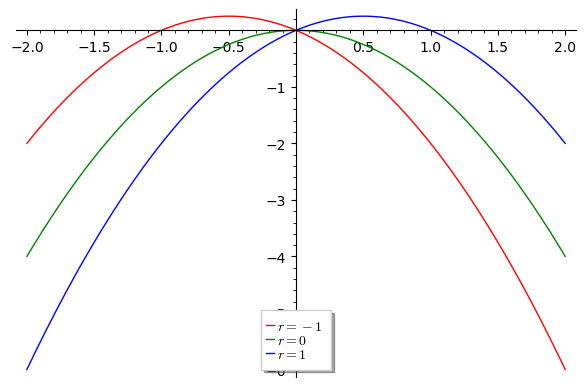

In [25]:
f(x) = r*x-x^2
p1 = plot(f(r=-1),(-2,2), color='red', legend_label='$r=-1$')
p2 = plot(f(r=0),(-2,2), color='green', legend_label='$r=0$')
p3 = plot(f(r=1),(-2,2), color='blue', legend_label='$r=1$')
show(p1+p2+p3)

Para a maior parte dos valores de $r$ o sistema tem dois equilíbrios, mas quando $r=0$ o sistema perde um dos equilíbrios e troca de estabilidade. Vejamos:

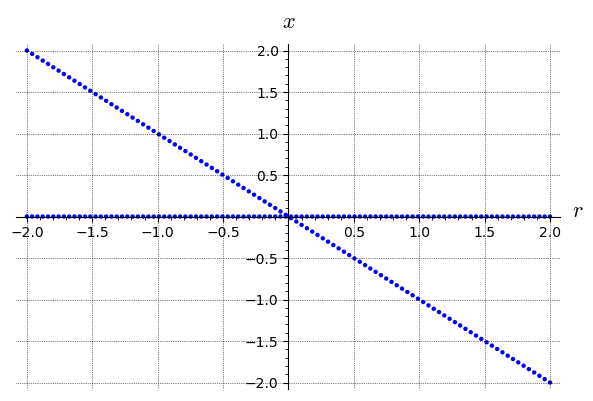

In [26]:
def drawbif(func,l,u):
    pts = []
    ipts = []
    epts = []
    for v in np.linspace(l,u,100):
        g = func(r=v)
#         dg = diff(g,x)
        xvals = solve(g,x)
        pts.extend([[v,n(i.rhs().real_part())] for i in xvals])
#         for e in pts:
#             if e[1]<0:
#                 epts.append((v,n(e[0])))
#             elif e[1] == 0:
#                 pass
#             else:
#                 ipts.append((v,n(e[0])))
#     eplot = points(epts, color="blue")
#     iplot = points(ipts, color="red")
    
    show(points(pts),axes_labels=['$r$','$x$'],gridlines=True)
var('r')
f(x) = r*x + x^2
drawbif(f,-2,2)



### Bifurcação Pitchfork (Garfo)

Um exemplo simples de bifurcação Pitchfork é:

$$\frac{dx}{dt}= r*x -x^3$$

Aqui novamente temos uma bifurcação quando o parâmtro de bifurcação $r$ cruza o valor de $r=0$. Na equação acima, quando $r$ torna-se positivo, dois novos equilíbrios aparecem:


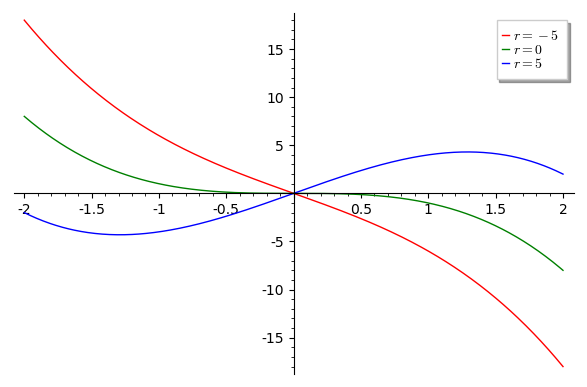

In [45]:
f(x) = r*x-x^3
p1 = plot(f(r=-5),(-2,2), color='red', legend_label='$r=-5$')
p2 = plot(f(r=0),(-2,2), color='green', legend_label='$r=0$')
p3 = plot(f(r=5),(-2,2), color='blue', legend_label='$r=5$')
show(p1+p2+p3)

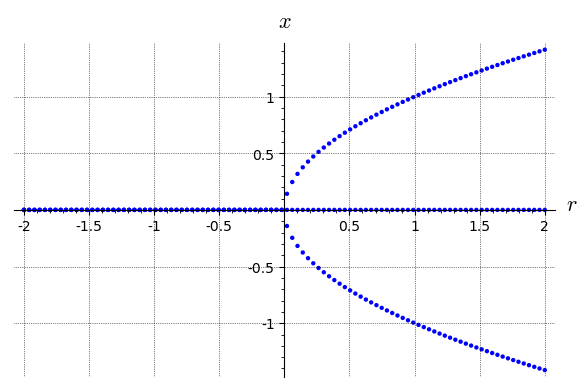

In [48]:
f(x) = r*x - x^3
drawbif(f,-2,2)

se mudarmos o sinal do termo cúbico obtemos uma bifurcação pitchfork subcrítica:

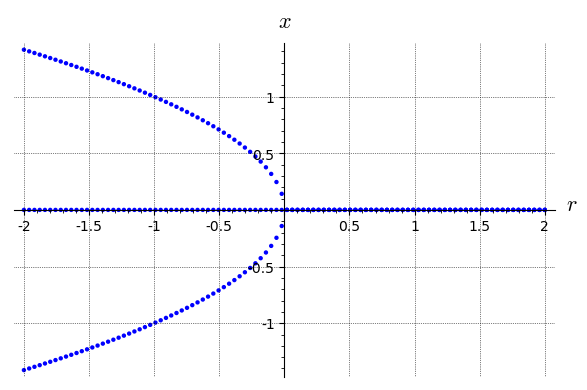

In [30]:
f(x) = r*x + x^3
drawbif(f,-2,2)

### Bifurcação de Hopf

A [bifurcação de Hopf](https://en.wikipedia.org/wiki/Hopf_bifurcation) é importante por dar orígem a equilíbrios periódicos denominados limit cycles. Bifurcações de Hopf ocorrem em sistemas com autovalores complexos e se dá quando o sinal da parte real destes, muda. Numa bifurcação de Hopf, não surgem novos equilíbrios, mas surge uma solução periódica em torno do equilíbrio original.

Um exemplo simples de sistema apresentando uma bifurcação de Hopf é o modelo de Selkov.
Modelo de Selkov

Este modelo representa uma reação bioquímica importtante: a glicólise. Nesta reação a glicose é quebrada, dentro da célula, em piruvato.

$$\frac{dx}{dt} = -x + ay + x^2 y, $$

$$\frac{dy}{dt} = b - a y - x^2 y$$

[Selkov, E., Model of glycolytic oscillations, (1968) Eur. J. Biochem. 4, 79-86](http://onlinelibrary.wiley.com/doi/10.1111/j.1432-1033.1968.tb00175.x/full).

Vamos começar com uma simples simulação deste sistema:


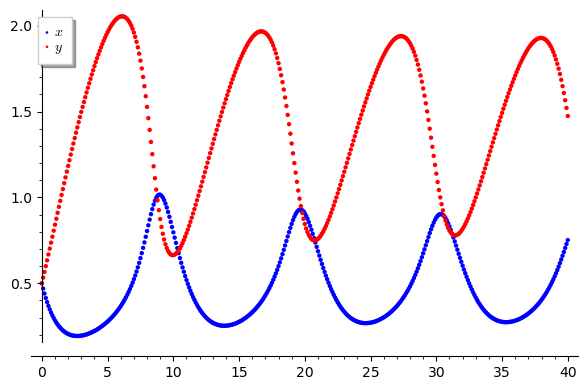

In [27]:
var('x y a b')
a = 0.1
b=0.5
P = desolve_system_rk4([-x+a*y+x**2*y, b-a*y-x**2*y], [x,y],ics=[0,.5,.5],ivar='t', end_points=[0,40])
X=[ [i,j] for i,j,k in P]
Y=[ [i,k] for i,j,k in P]
XP=list_plot(X, legend_label='$x$')
YP=list_plot(Y, legend_label='$y$', color='red')
XP+YP

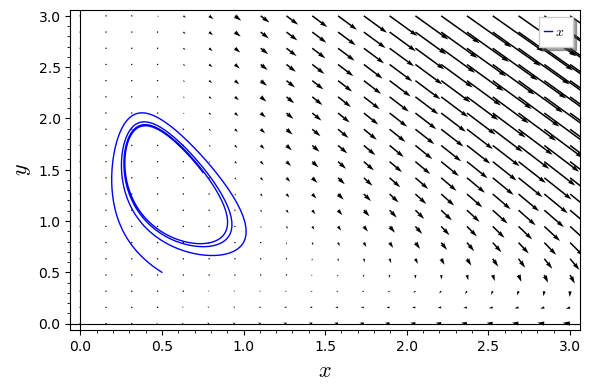

In [28]:
vf = plot_vector_field([-x+a*y+x**2*y, b-a*y-x**2*y],(x,0,3),(y,0,3),axes_labels=[r'$x$',r'$y$'])
traj = list_plot([ [j,k] for i,j,k in P], plotjoined=True, legend_label='$x$')
vf+traj

In [29]:
var('x y a b')
J= jacobian([-x+a*y+x**2*y, b-a*y-x**2*y], [x,y])
J

[2*x*y - 1   x^2 + a]
[   -2*x*y  -x^2 - a]

In [31]:
J.eigenvalues()

[-1/2*x^2 + x*y - 1/2*a - 1/2*sqrt(x^4 + 4*x^2*y^2 + 2*(a - 1)*x^2 + a^2 - 4*(x^3 + (a + 1)*x)*y - 2*a + 1) - 1/2,
 -1/2*x^2 + x*y - 1/2*a + 1/2*sqrt(x^4 + 4*x^2*y^2 + 2*(a - 1)*x^2 + a^2 - 4*(x^3 + (a + 1)*x)*y - 2*a + 1) - 1/2]

In [30]:
J(a=0.1,b=0.4).eigenvalues()

[-1/2*x^2 + x*y - 1/20*sqrt(100*x^4 + 400*x^2*y^2 - 180*x^2 - 40*(10*x^3 + 11*x)*y + 81) - 11/20,
 -1/2*x^2 + x*y + 1/20*sqrt(100*x^4 + 400*x^2*y^2 - 180*x^2 - 40*(10*x^3 + 11*x)*y + 81) - 11/20]

In [32]:
var('x y a b')
@interact
def _(a=input_box(default=0.1),
      b=(.4,(0.1,1)),
      fin = input_box(default=-x+a*y+x**2*y), gin=input_box(default=b-a*y-x**2*y),
      xmin=input_box(default=0), xmax=input_box(default=1.5),
      ymin=input_box(default=0), ymax=input_box(default=2.8),
      x_start=(0,(0,3,.1)), y_start=(2,(0,3,.1)), error=(0.5,(0,1)),
      t_length=(100,(0, 200)) , num_of_points = (1500,(5,2000)),
      algorithm = selector([
         ("rkf45" , "runga-kutta-felhberg (4,5)"),
         ("rk2" , "embedded runga-kutta (2,3)"),
         ("rk4" , "4th order classical runga-kutta"),
         ("rk8pd" , 'runga-kutta prince-dormand (8,9)'),
         ("rk2imp" , "implicit 2nd order runga-kutta at gaussian points"),
         ("rk4imp" , "implicit 4th order runga-kutta at gaussian points"),
         ("bsimp" , "implicit burlisch-stoer (requires jacobian)"),
         ("gear1" , "M=1 implicit gear"),
         ("gear2" , "M=2 implicit gear")
      ])):
    f(x,y)=fin(a=a, b=b)
    g(x,y)=gin(a=a, b=b)
    show(f)
    show(g)
    ff = f._fast_float_(*f.args())
    gg = g._fast_float_(*g.args())
    

    #solve
    path = []
    err = error
    xerr = 0
    for yerr in [-err, 0, +err]:
      T=ode_solver()
      T.algorithm=algorithm
      T.function = lambda t, yp: [ff(yp[0],yp[1]), gg(yp[0],yp[1])]
      T.jacobian = lambda t, yp: [[diff(fun,dval)(yp[0],yp[1]) for dval in [x,y]] for fun in [f,g]]
      T.ode_solve(y_0=[x_start + xerr, y_start + yerr],t_span=[0,t_length],num_points=num_of_points)
      path.append(line([p[1] for p in T.solution]))
      
    #plot
    xnull = implicit_plot(ff,(x,0.,1.5),(y,0.,2.5), color='green',axes_labels=['$x$','$y$'], legend_label='nuliclina de $x$',show_legend=True)
    ynull = implicit_plot(gg,(x,0.,1.5),(y,0.,2.5), color='red',axes_labels=['$x$','$y$'], legend_label='nuliclina de $y$',show_legend=True)
    vector_field = plot_vector_field( (f,g), (x,xmin,xmax), (y,ymin,ymax), plot_points=25 )
    starting_point = point([x_start, y_start], pointsize=50)
    show(vector_field + starting_point + sum(path)+xnull+ynull, aspect_ratio=1, figsize=[8,9],gridlines=True)

Interactive function <function _ at 0x7fcaa6c93dc0> with 14 widgets
  a: EvalText(value='0.100000000000000', d…

Para encontrar o equilíbrio pontual do sistema, basta resolver o sistema:

In [33]:
var('x y a b')
xdot(x,y) = -x+a*y+x**2*y
ydot(x,y) = -x^2*y - a*y + b
solve([xdot, ydot], [x,y])

[[x == b, y == b/(b^2 + a)]]

Se nós substituirmos o valores de equilíbrio do sistema na matriz jacobiana:

In [34]:
Jeq = J(x=b, y=b/(b^2+a))
Jeq

[2*b^2/(b^2 + a) - 1             b^2 + a]
[   -2*b^2/(b^2 + a)            -b^2 - a]

Podemos encontrar os autovalores do sistema:

In [37]:
evs = Jeq(a=0.1).eigenvalues()
evs

[-1/20*(100*b^4 - 80*b^2 + sqrt(10000*b^8 - 56000*b^6 - 3400*b^4 - 2960*b^2 + 81) + 11)/(10*b^2 + 1),
 -1/20*(100*b^4 - 80*b^2 - sqrt(10000*b^8 - 56000*b^6 - 3400*b^4 - 2960*b^2 + 81) + 11)/(10*b^2 + 1)]

Uma vez fixado o parâmetro $a$, os autovalores passam a ser polinômios em $b$:

In [38]:
pol(b) = evs[0](a=0.1)
show(pol)
find_root(real_part(pol),0.3,0.5)

b |--> -1/20*(100*b^4 - 80*b^2 + sqrt(10000*b^8 - 56000*b^6 - 3400*b^4 - 2960*b^2 + 81) + 11)/(10*b^2 + 1)

0.41999190736246605

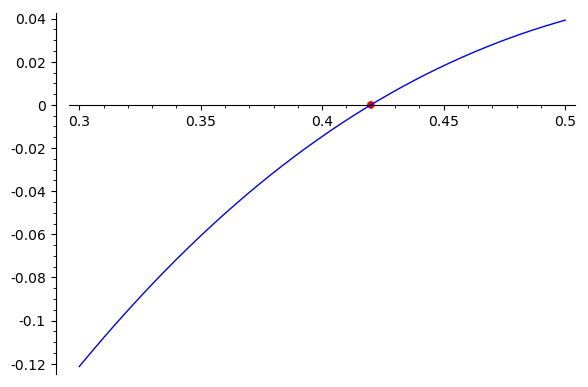

In [66]:
pt = point((find_root(real_part(pol),0.3,0.5),0), color='red', pointsize=30)
P = plot(real_part(pol),(b,0.3,0.5))
P+pt

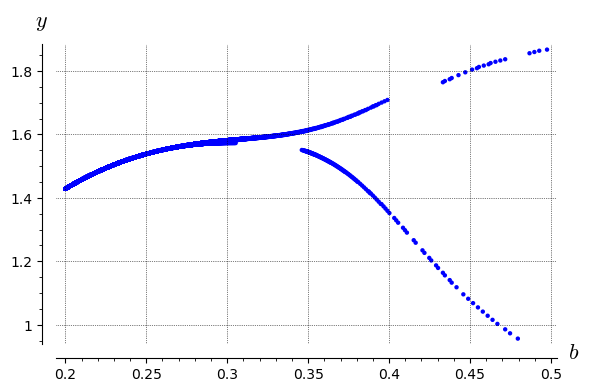

In [67]:
import numpy as np
a=0.1

def drawbif_selkov(l,u):
    def selkov(t,S):
        x,y = S
        return [xdotf(x,y), ydotf(x,y)]
        
    T.function = selkov
    pts = []
    for b in np.linspace(l,u,500):
        xdotf=xdot(b=b, a=0.1)._fast_float_(*xdot.args())
        ydotf=ydot(b=b, a=0.1)._fast_float_(*ydot.args())
        T.ode_solve(y_0=[0,2],t_span=[0,50],num_points=500)
        sol = T.solution
        pts += [(b,j[1]) for i,j in sol[-100:] if abs(j[0]-b) <1e-3]
    
    show(points(pts),axes_labels=['$b$','$y$'],gridlines=True)
    
T = ode_solver()
T.algorithm="rk8pd"


drawbif_selkov(0.2,0.5)